<a href="https://colab.research.google.com/github/PavelYakimov/dpo-cv/blob/main/Lab-1/Lab-1-draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Opened image


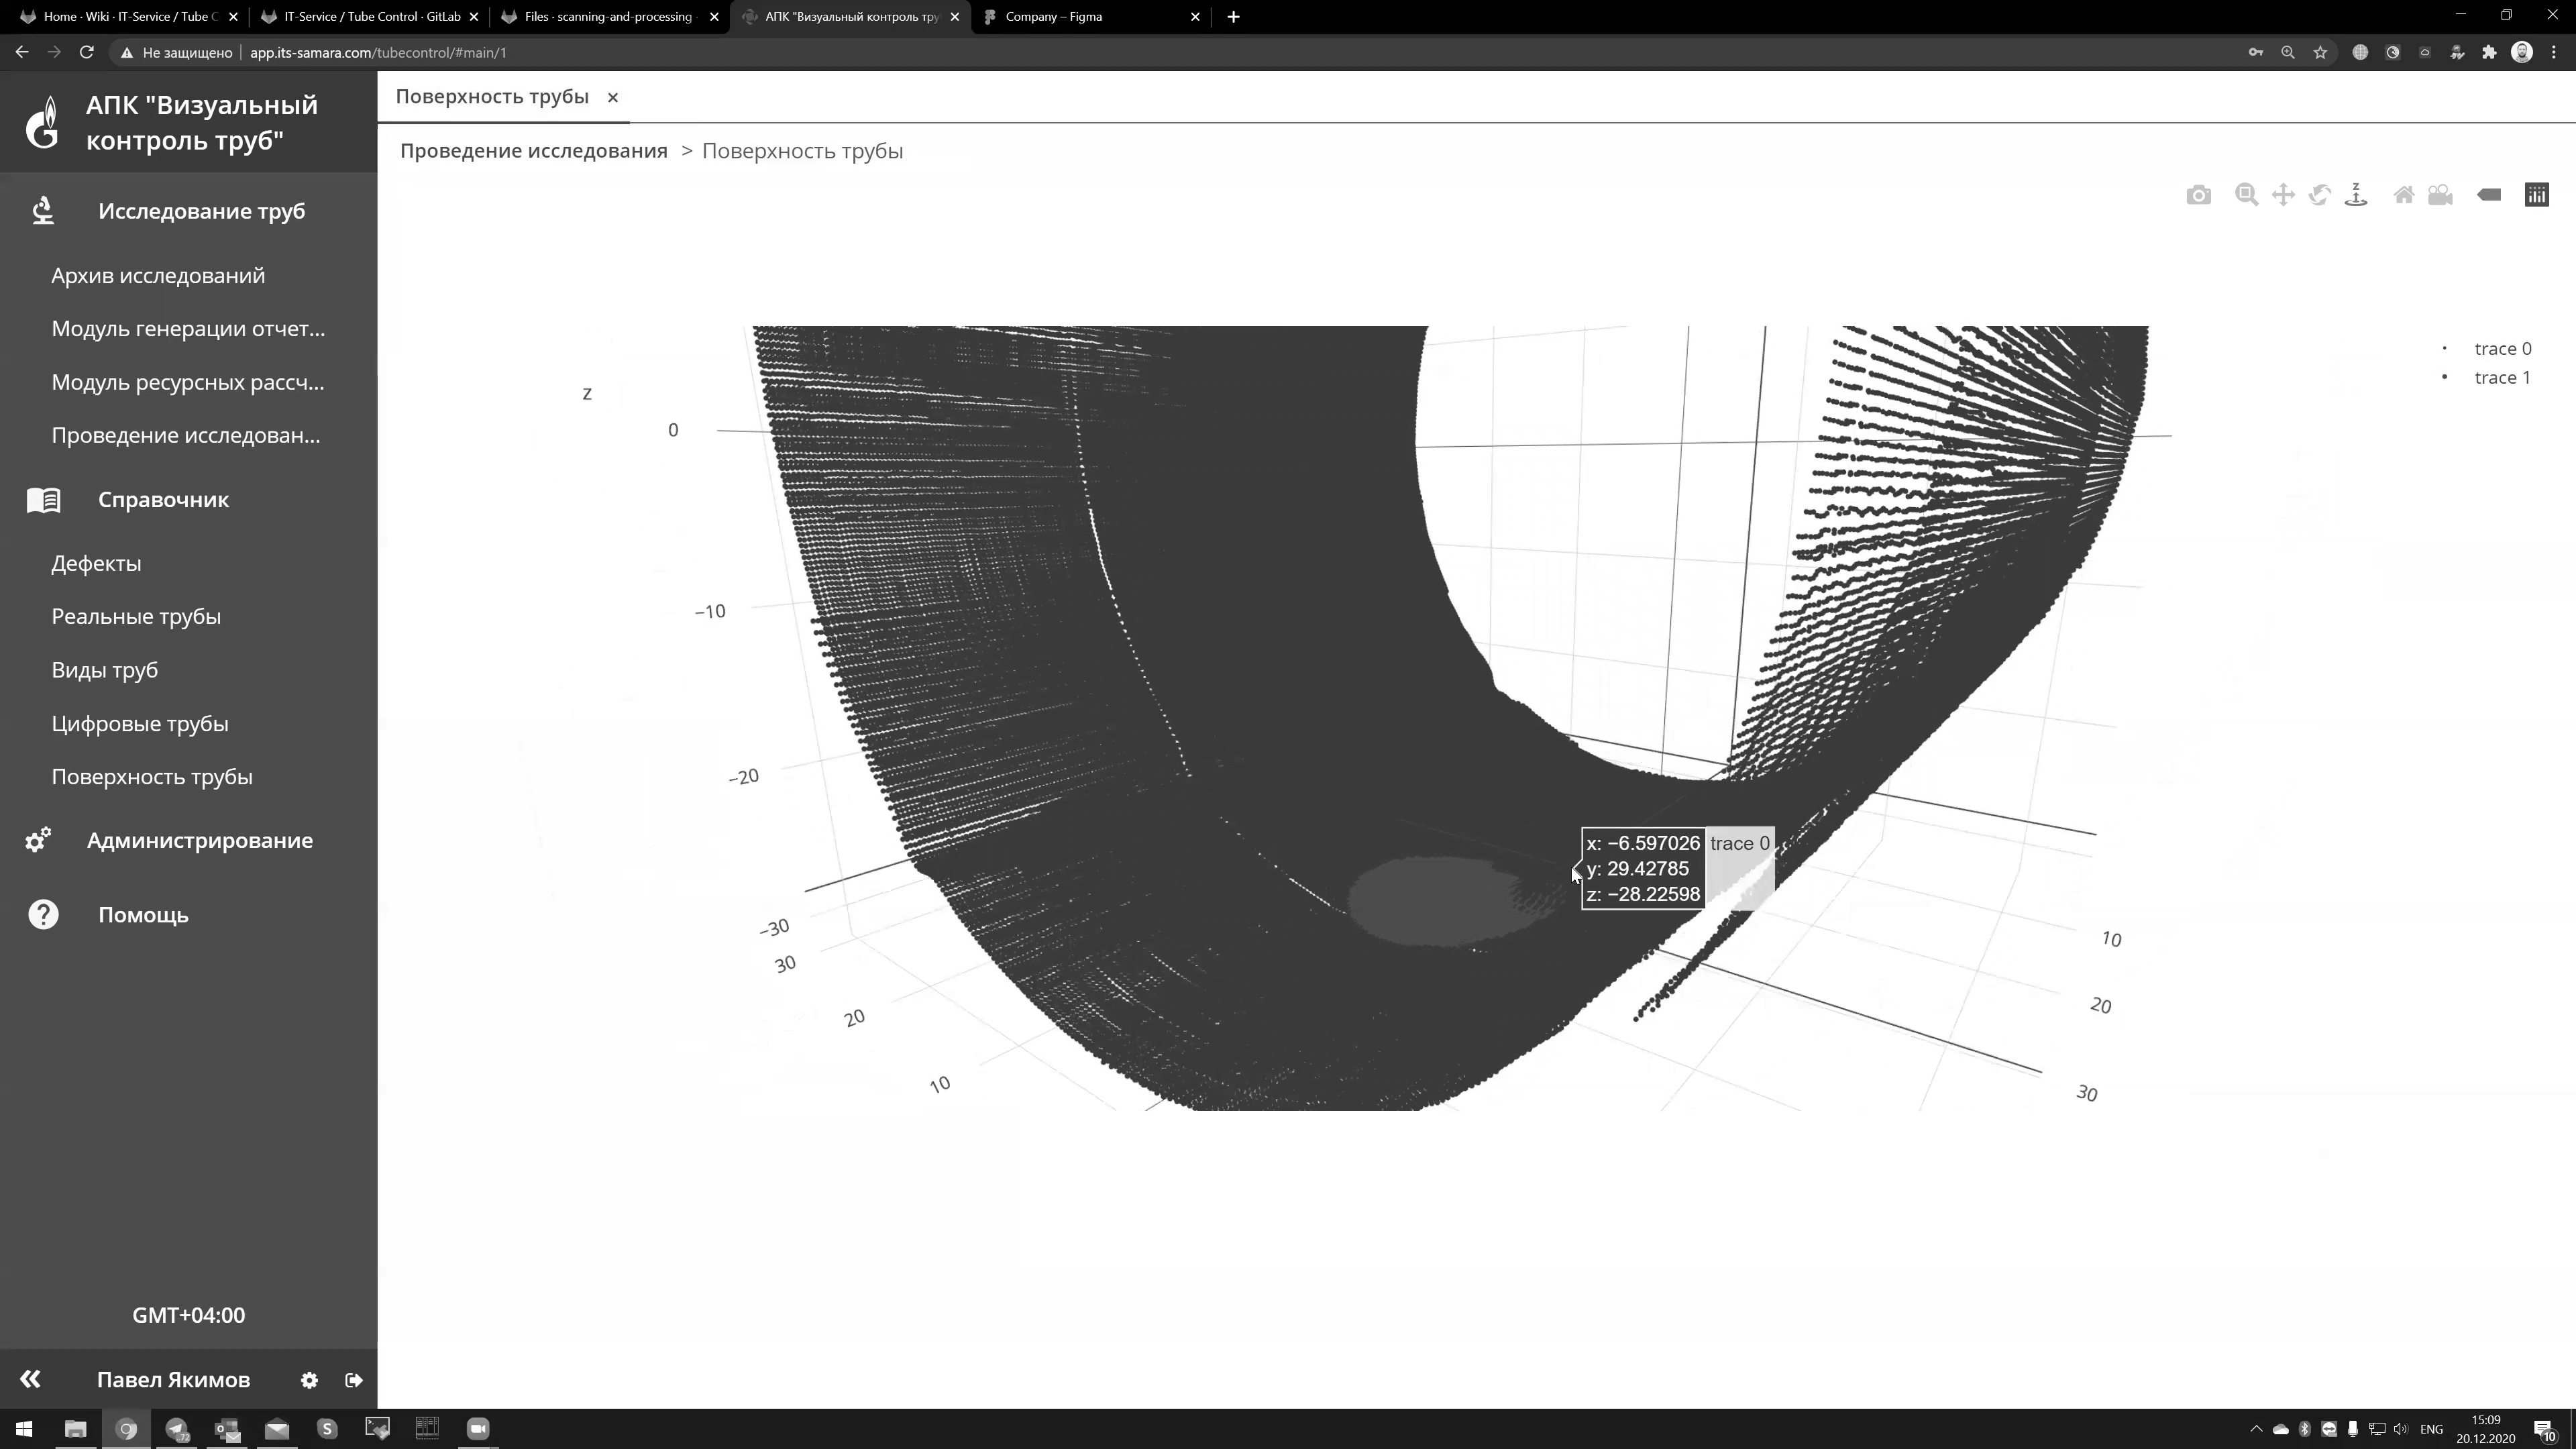

In [36]:
from PIL import Image
from IPython.display import Image as Image2

with Image.open("test_image.png").convert('L') as im1:
  print('Opened image')
  display(im1)

im1.save("grayscale.png")

In [46]:
im1.getpixel((300,156))

255

In [15]:
width, height = im1.size
print(width, height)

3840 2160


In [23]:
im1.getpixel((1920,1080))

#im1.putpixel((1920,1080), (255,0,0))

#display(im1)

58

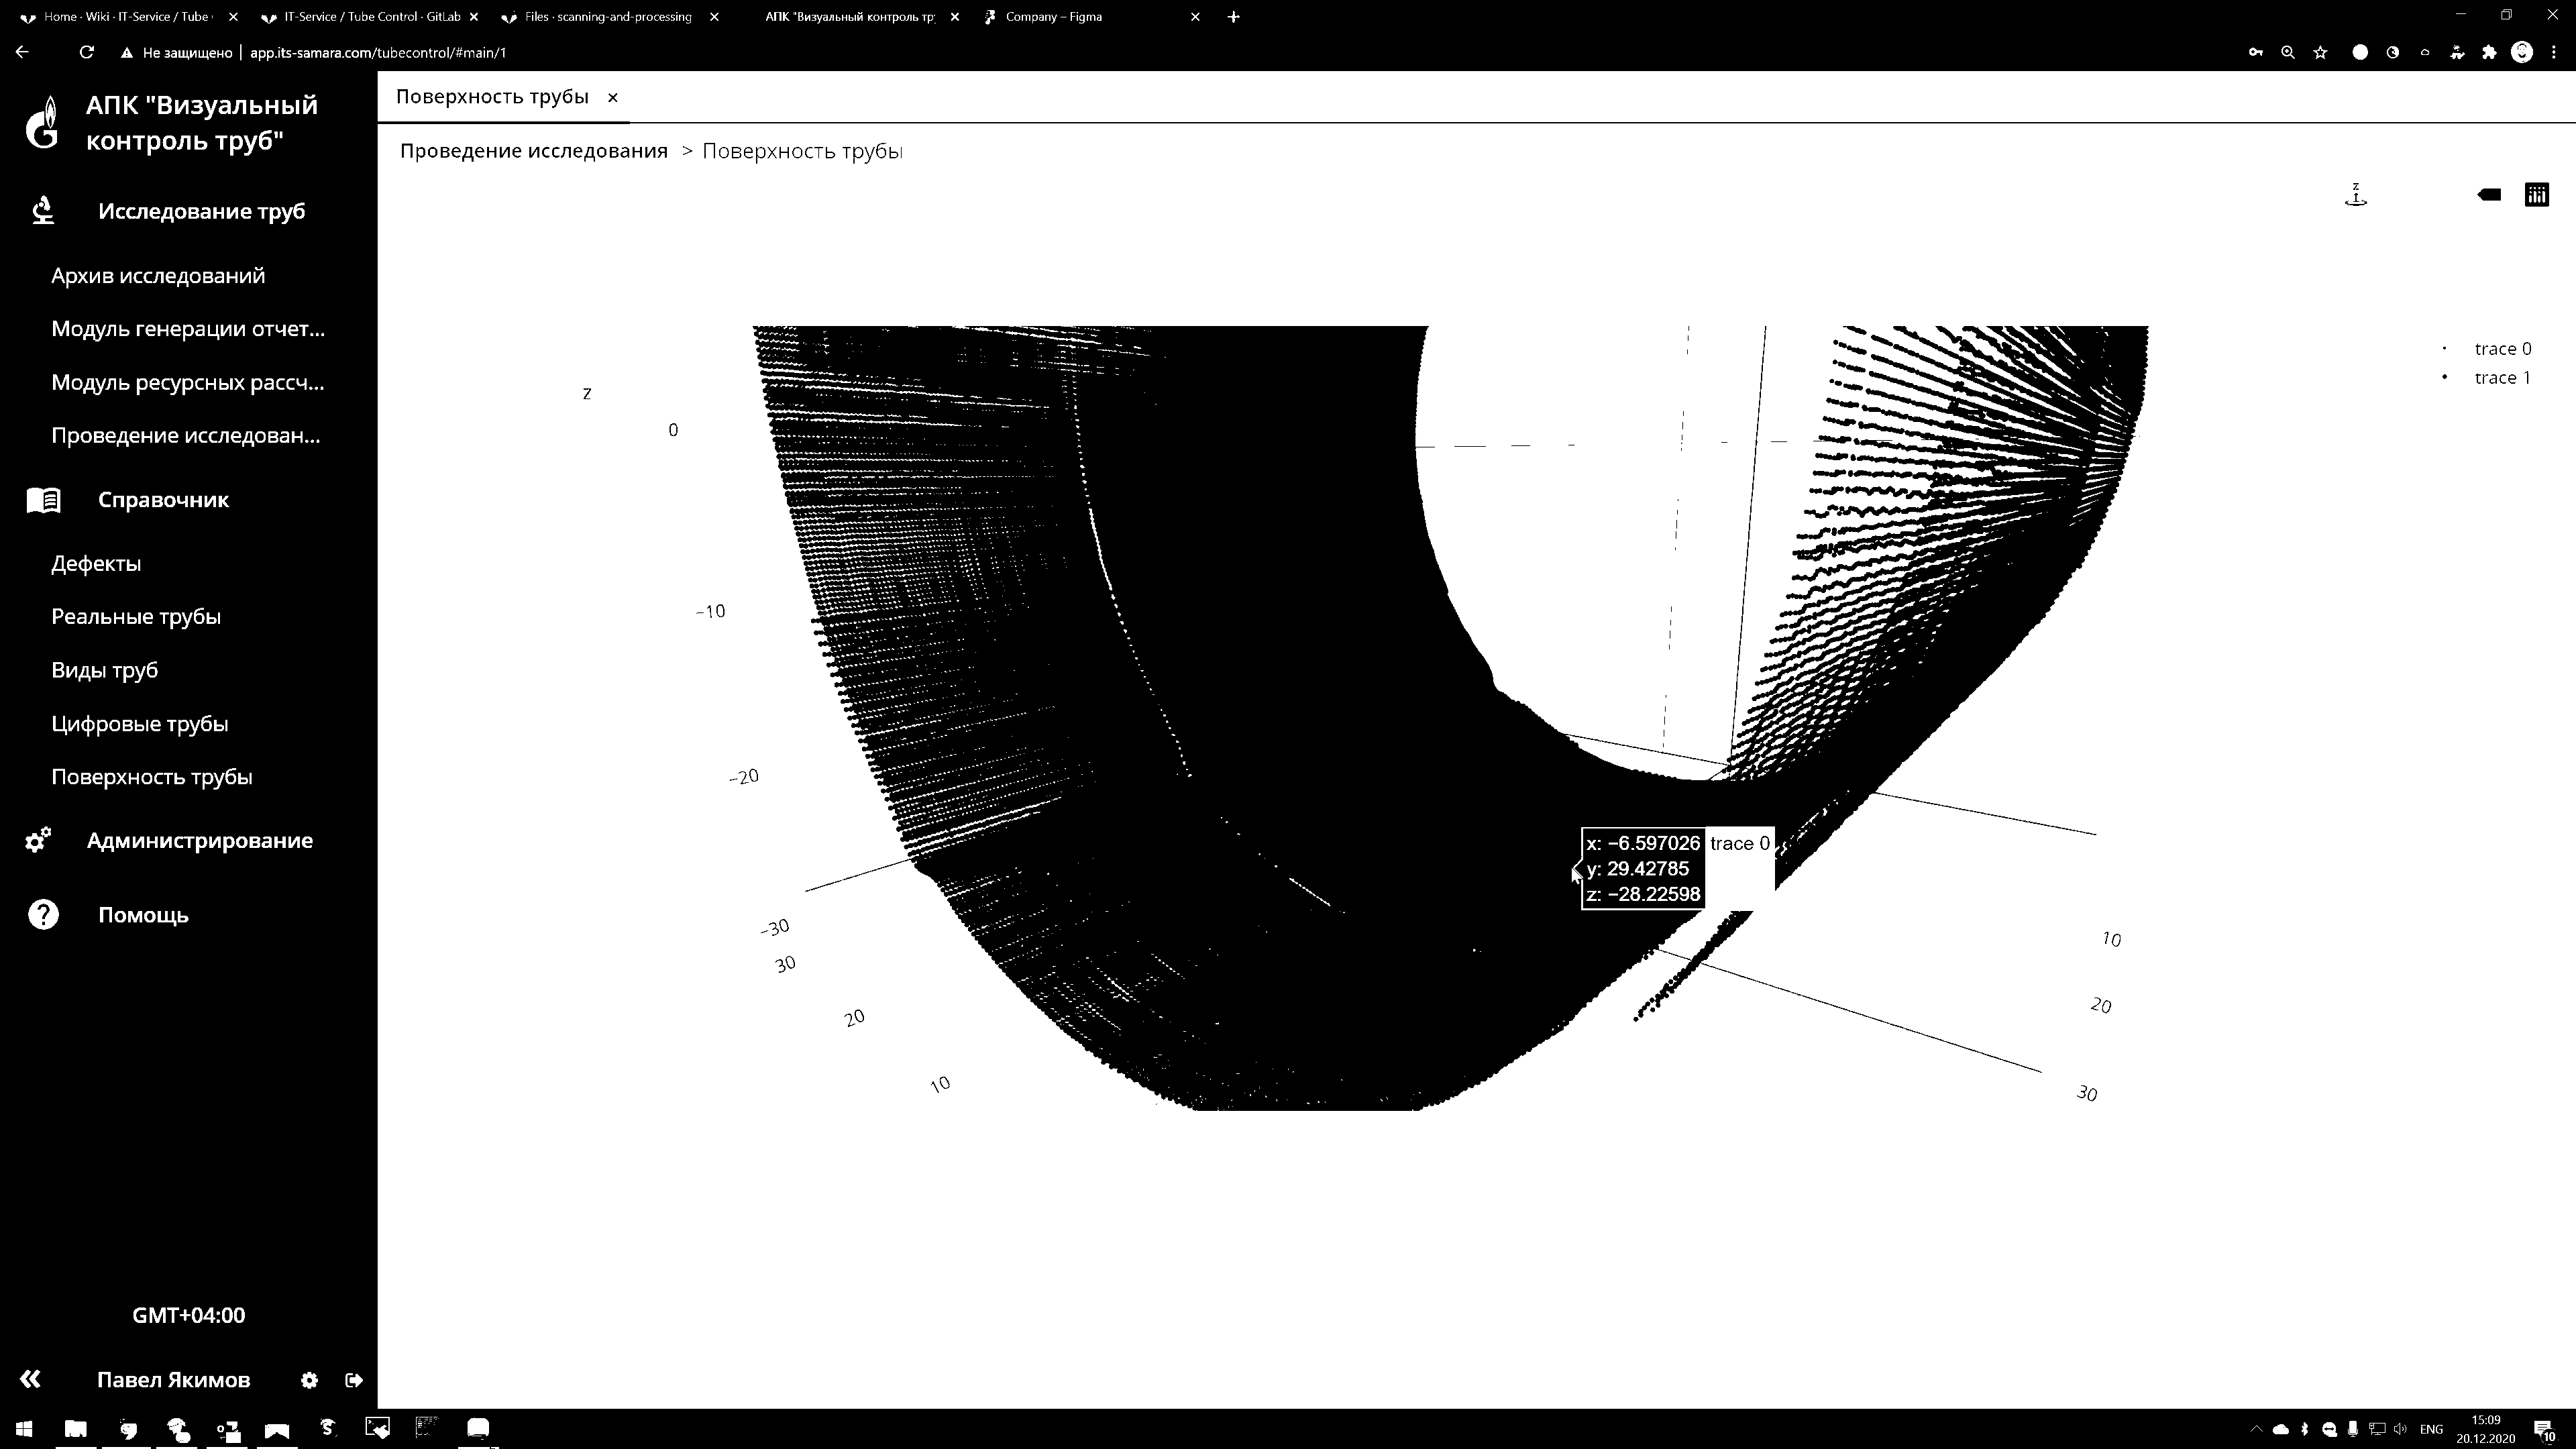

In [37]:
binaryImage = im1

threshold = 128

for x in range(width):
  for y in range(height):
    if im1.getpixel((x,y)) < threshold:
      binaryImage.putpixel((x,y), 0)
    else:
      binaryImage.putpixel((x,y), 255)

display(binaryImage) 


In [31]:
def erode(binImg, x, y):
  neighbour1 = binImg.getpixel((x-1,y))
  neighbour2 = binImg.getpixel((x,y-1))
  neighbour3 = binImg.getpixel((x+1,y))
  neighbour4 = binImg.getpixel((x,y+1))
  return neighbour1==0 or neighbour2==0 or neighbour3==0 or neighbour4==0

In [ ]:
display(binaryImage)

In [41]:
#erodedImage = binaryImage.copy()

for x in range(width-2):
  for y in range(height-2):
    if erode(binaryImage, x+1, y+1):
      erodedImage.putpixel((x+1,y+1), 0)



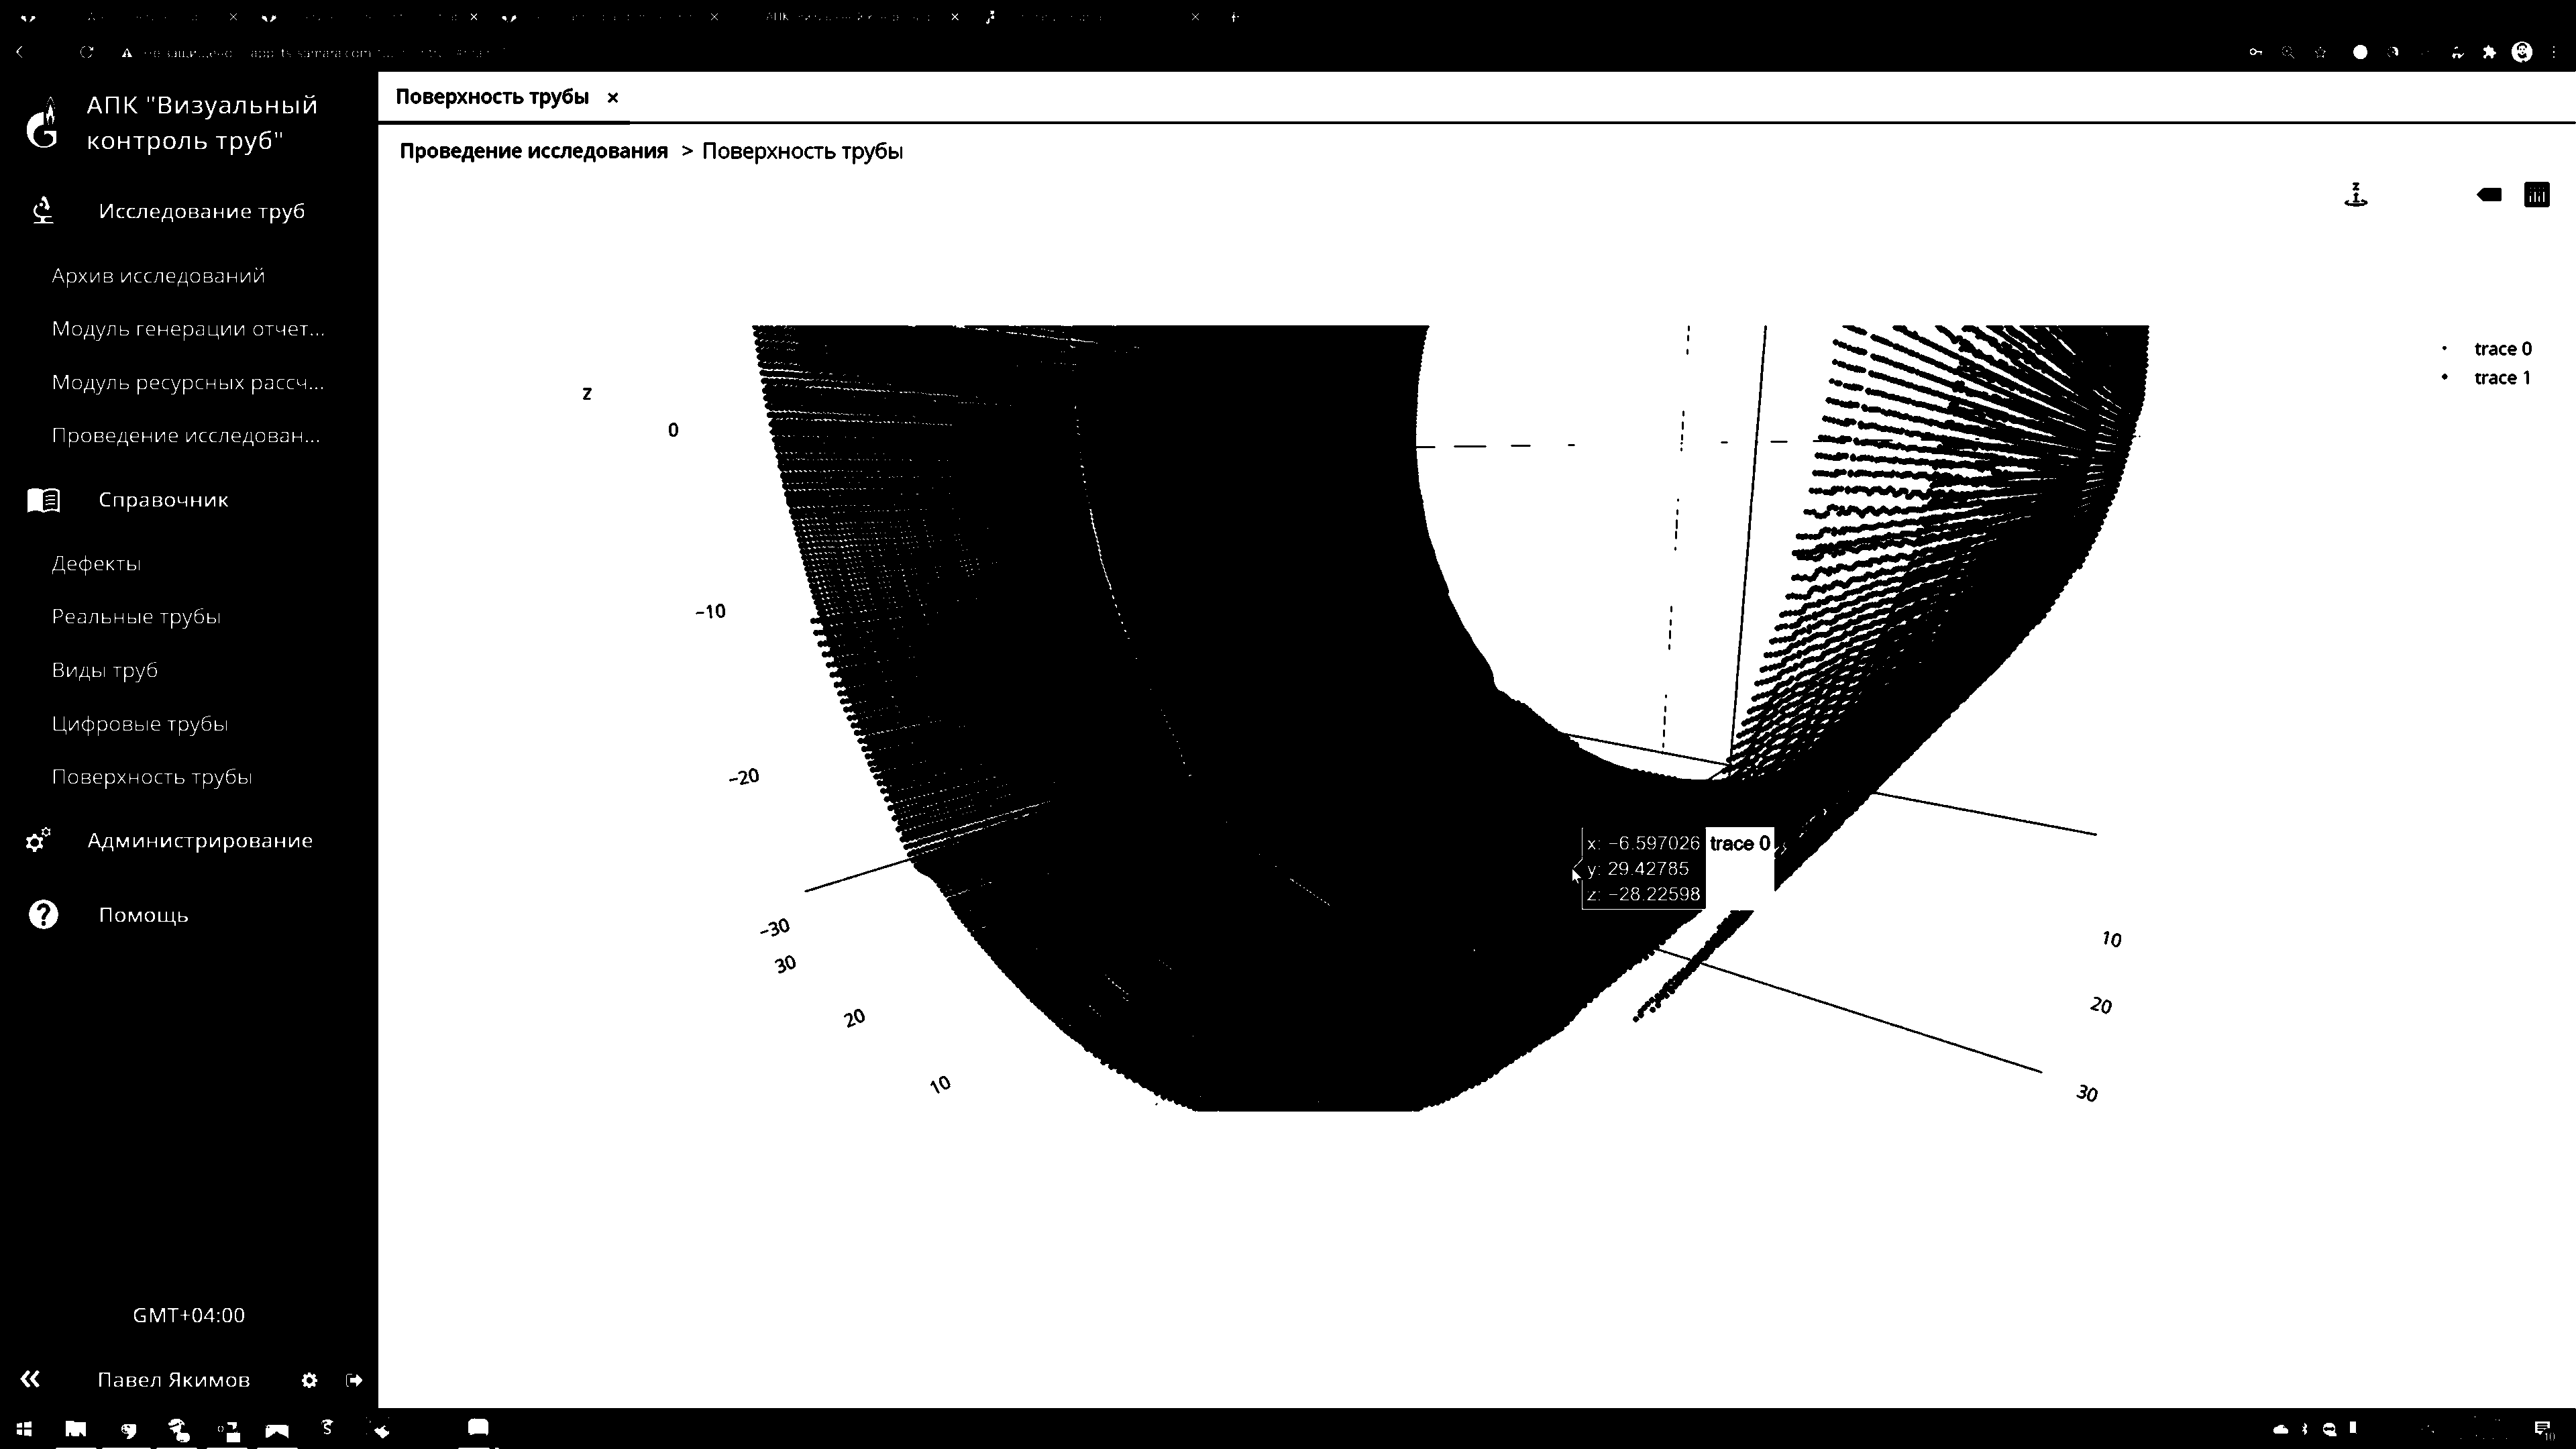

In [42]:
display(erodedImage)

In [43]:
from PIL import ImageChops

diffImg = ImageChops.difference(binaryImage, erodedImage)



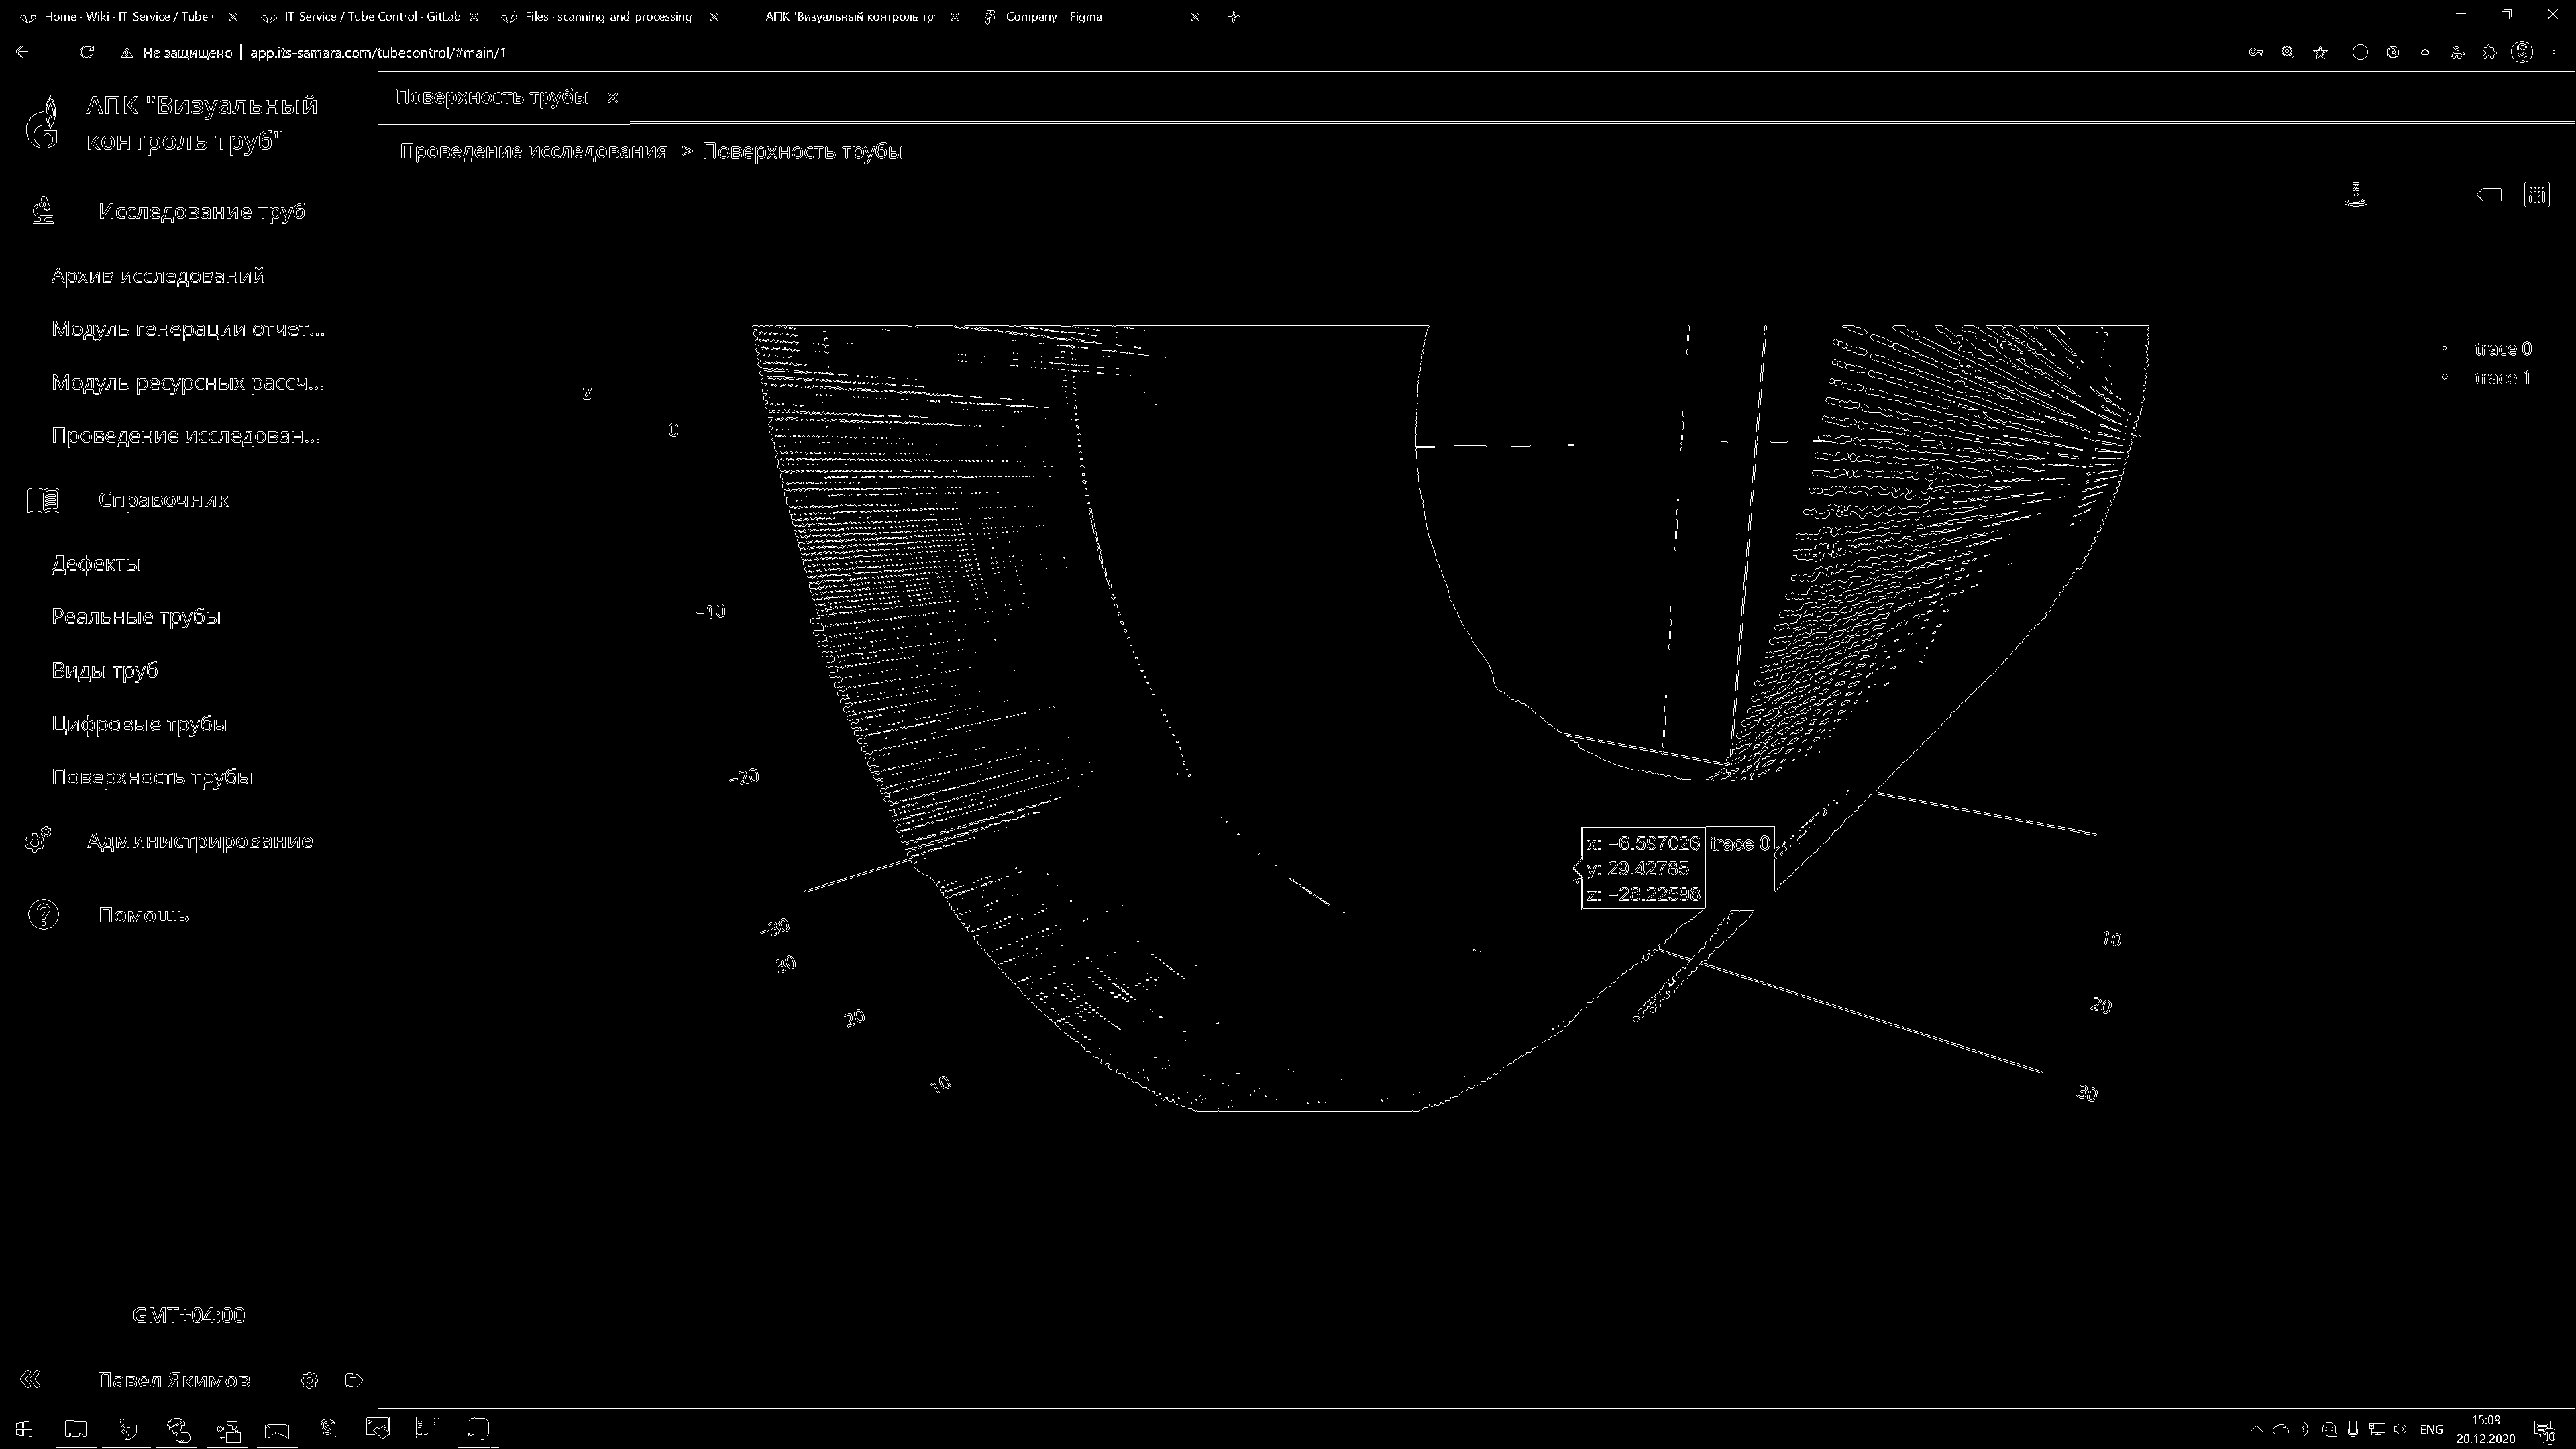

In [44]:
display(diffImg)

In [64]:
def medianFilter(img, x, y):
  neighbors = []
  for i in [-1, 0, 1]:
    for j in [-1, 0, 1]:
      neighbors.append(img.getpixel((x+i,y+j)))
  neighbors.sort()
  return neighbors[len(neighbors)//2]



In [65]:
medianFilter(im1, 300, 156)


255